# Naive Bayes Classification on Iris Dataset

In this notebook, we explore the application of a Naive Bayes classifier on the famous Iris dataset. The Iris dataset is a classic benchmark dataset in machine learning, consisting of measurements of iris flowers from three different species: Setosa, Versicolor, and Virginica. Our goal is to train a Naive Bayes classifier to predict the species of iris flowers based on their sepal and petal measurements.

## Outline:

1. Data Loading and Exploration: We start by loading the dataset and exploring its structure and contents to gain insights into the features and target variable.
2.   Data Preprocessing: Next, we preprocess the dataset by encoding the categorical target variable and splitting it into training and testing sets.
3. Model Training: We then train a Naive Bayes classifier using the training data, leveraging the Gaussian Naive Bayes implementation provided by scikit-learn.
4. Model Evaluation: After training the model, we evaluate its performance on the testing set using accuracy as the evaluation metric. Additionally, we analyze the model's behavior and discuss potential factors influencing its performance.
5. Variability Analysis: Finally, we investigate the variability in the model's performance by systematically changing the random seed parameter during data splitting and observing changes in accuracy scores.



Through this analysis, we aim to gain insights into the effectiveness of the Naive Bayes classifier for the Iris dataset and understand the impact of randomization on model performance.

# Loading and Displaying the Dataset

In this section, we load the Iris dataset from a CSV file into a Pandas DataFrame. The dataset contains information about sepal and petal dimensions of three different species of iris flowers. We use Pandas to read the CSV file and assign meaningful column names to the dataset. Finally, we display the first few rows of the DataFrame to inspect the data structure.


In [37]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

# Assuming your data is in 'your_dataset.csv'
dataset = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Display the first few rows of the DataFrame
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis (EDA) - Violin Plots

In this section, we perform Exploratory Data Analysis (EDA) using violin plots to visualize the distribution of each feature in the Iris dataset across different classes. Violin plots are useful for displaying the distribution of numeric data and provide insights into the central tendency, variability, and skewness of each feature within each class. We use the seaborn library to create violin plots for each feature, showing their distribution across the target classes. The x-axis represents the features, while the y-axis represents the classes. Each violin plot displays the kernel density estimation of the feature values, with additional information such as quartiles and outliers.


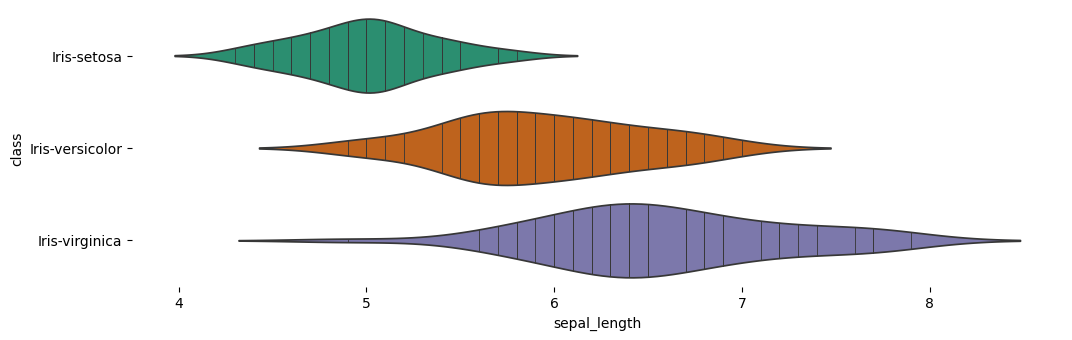

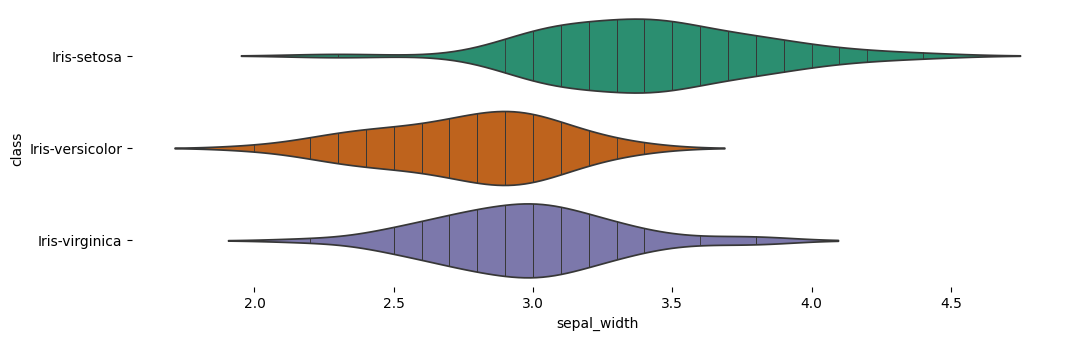

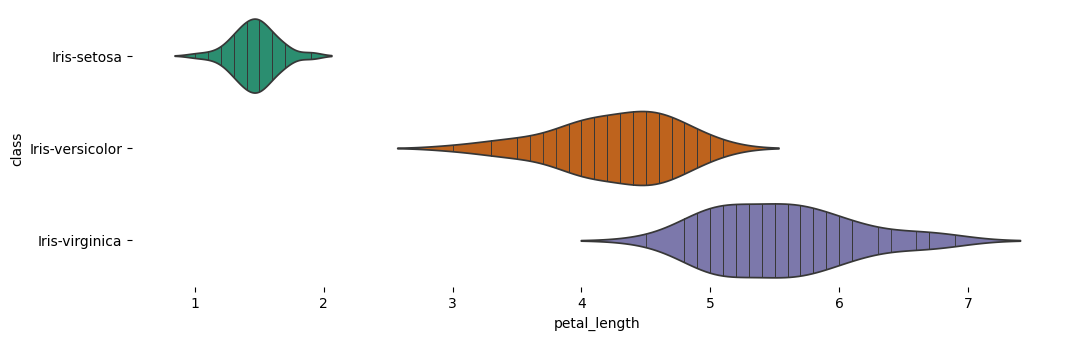

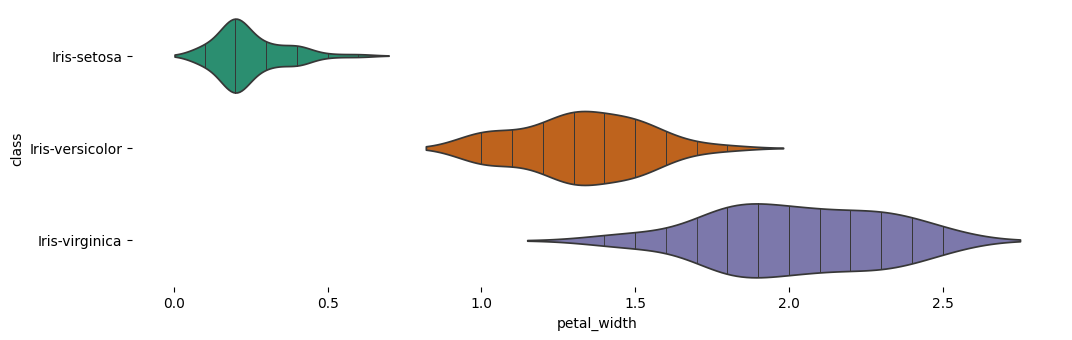

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

for feature in dataset.columns[:-1]:
    figsize = (12, 1.2 * len(dataset['class'].unique()))
    plt.figure(figsize=figsize)
    sns.violinplot(data=dataset, x=feature, y='class', inner='stick', palette='Dark2')
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.show()


# Preprocessing: Encoding Labels

In this section, we preprocess the target column of the dataset by encoding the categorical class labels into numerical labels using the LabelEncoder from scikit-learn. This step is essential for machine learning algorithms that require numerical inputs. We first extract the features and the target column from the DataFrame, then apply the LabelEncoder to convert the string labels into numerical labels. Finally, we concatenate the features with the numerical labels into a NumPy array for further processing.




In [39]:

from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your pandas DataFrame
# Replace 'target_column' with the actual name of your target column
target_column = 'class'

# Extract features and labels from the DataFrame
X = dataset.drop(target_column, axis = 1).values  # Features
y_str = dataset[target_column].values  # String labels

# Use LabelEncoder to convert string labels to numerical labels
label_encoder = LabelEncoder()
y_num = label_encoder.fit_transform(y_str)

# Concatenate features and numerical labels into a NumPy array
Irisdata = np.column_stack((X, y_num))
# Now X_with_labels is a NumPy array where the last column contains numerical labels


# Calculating Mean and Covariance for Each Class

In this section, we define a function `calculate_mean_covariance` to compute the mean and covariance matrix for each class in the dataset. The function takes the dataset `X` as input and iterates over unique class labels to calculate the mean vector and covariance matrix for each class. It then returns lists of class means and covariances, which are essential for building a Naive Bayes classifier based on Gaussian distributions.


In [40]:
def calculate_mean_covariance(X):

    classes = np.unique(X[:, -1])

    class_means = []
    class_covariances = []

    for c in classes:
        # Select rows where the class label is c
        class_data = X[X[:, -1] == c][:, :-1]  # Exclude the last column (class label)

        # Calculate mean for each feature
        mean_vector = np.mean(class_data, axis=0)

        # Calculate covariance matrix
        covariance_matrix = np.cov(class_data, rowvar=False)

        class_means.append(mean_vector)
        class_covariances.append(covariance_matrix)

    return class_means, class_covariances

# Splitting the Dataset into Training and Testing Sets

In this section, we split the preprocessed dataset into training and testing sets using the `train_test_split` function from scikit-learn. This step is crucial for evaluating the performance of our machine learning model. We allocate 70% of the data for training and 30% for testing, ensuring that the data is randomly shuffled and stratified based on the class labels. By specifying a random seed (`random_state=69`), we ensure reproducibility of the results.


In [63]:
X = Irisdata[:, :-1]
y = Irisdata[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =1233)

# Training the Naive Bayes Classifier

In this section, we prepare the training set for the Naive Bayes classifier by combining the features (X_train) with the corresponding class labels (y_train) into a single NumPy array. We then calculate the mean and covariance matrices for each class using the `calculate_mean_covariance` function defined earlier. These statistics are essential for building the Naive Bayes classifier based on Gaussian distributions.


In [64]:
Trainset = np.column_stack((X_train, y_train))
mean, covariance = calculate_mean_covariance(Trainset)

# Predicting the Class for Test Data

In this section, we define a function `predict_class` to predict the class labels for the test data based on the trained Naive Bayes classifier. The function takes the test set (`testset`), the mean vectors (`mean`), and the covariance matrices (`covariance`) calculated during training as input. It computes the probability of each class for the given test data using the Naive Bayes classification formula and returns the predicted class label.


In [65]:
def predict_class(testset, mean, covariance):
    d = len(mean[0])
    t = (2*math.pi)**(d/2)
    problist = []
    for i in range(len(mean)):
        detC = np.sqrt(np.linalg.det(covariance[i]))
        p = np.dot(np.dot((testset - mean[i]), np.linalg.inv(covariance[i]) ), (testset - mean[i]).T )
        k = math.e**(-0.5*p)
        prob = k / (t * detC)
        problist.append(prob)
    return problist.index(max(problist))






# Generating Predictions for Test Data

In this section, we define a function `predict` to generate predictions for the test data using the trained Naive Bayes classifier. The function takes the test set (`X_test`), the mean vectors (`class_means`), and the covariance matrices (`class_covariances`) calculated during training as input. It iterates over each test data point, calls the `predict_class` function to predict the class label, and appends the predicted labels to a list. Finally, it returns the list of predictions.




In [66]:
def predict(X_test, class_means, class_covariances):
    predictions = []
    for test_point in X_test:
        predicted_class = predict_class(test_point, class_means, class_covariances)
        predictions.append(predicted_class)
    return predictions


# Generating Predictions for Test Data

In this section, we use the `predict` function to generate predictions for the test data (`X_test`) using the mean vectors (`mean`) and covariance matrices (`covariance`) calculated during training. The `predict` function iterates over each test data point, predicts the class label using the trained Naive Bayes classifier, and returns a list of predicted labels (`y_pred`). These predictions will be used to evaluate the performance of the classifier against the true labels (`y_test`).


In [67]:
y_pred = predict(X_test, mean, covariance)

# Evaluating Model Performance

In this section, we evaluate the performance of the Naive Bayes classifier on the test data using the `accuracy_score` function from scikit-learn. The `accuracy_score` function compares the true class labels (`y_test`) with the predicted class labels (`y_pred`) generated by the classifier and calculates the accuracy of the predictions. We print the accuracy score to assess the effectiveness of the trained classifier in correctly predicting the class labels of the test data.


In [68]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9777777777777777


# Evaluating Model Performance with Confusion Matrix

In this section, we analyze the performance of our Naive Bayes classifier in more detail by generating a confusion matrix. A confusion matrix provides a comprehensive view of the model's predictions by displaying the number of true positive, true negative, false positive, and false negative predictions for each class. We use the `confusion_matrix` function from scikit-learn to compute the confusion matrix based on the true labels (`y_test`) and the predicted labels (`y_pred`). Then, we visualize the confusion matrix as a heatmap using seaborn and matplotlib libraries to gain insights into the classifier's performance across different classes.


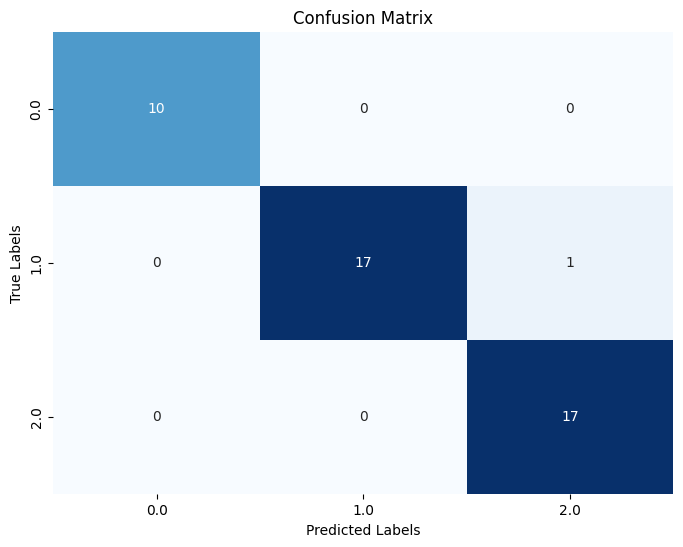

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Certainly! Here's a simplified version of the conclusion:
Conclusion

In this notebook, we applied a Naive Bayes classifier to the Iris dataset and observed variability in model performance. After preprocessing the data and training the classifier, we obtained accuracy scores ranging from 0.9777 to 1.0 on different runs. The variability in accuracy scores highlights the sensitivity of the model's performance to changes in the random seed (random_state) parameter during data splitting.

For reproducability, random_state = 1233 we get 0.9777 and with the current random_state we are getting 1.

By systematically changing the random seed, we observed differences in the composition of the training and testing sets, leading to fluctuations in model performance. This variability underscores the importance of reproducibility and careful evaluation when assessing machine learning models.

In summary, we successfully implemented a Naive Bayes classifier on the Iris dataset and observed varying accuracy scores, demonstrating the impact of randomization on model performance.

